<a href="https://colab.research.google.com/github/Ishita95-harvad/Halloween-Candy-Rankings/blob/main/Halloween_Candy_Rankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Halloween Candy Rankings**
Halloween Candy Rankings

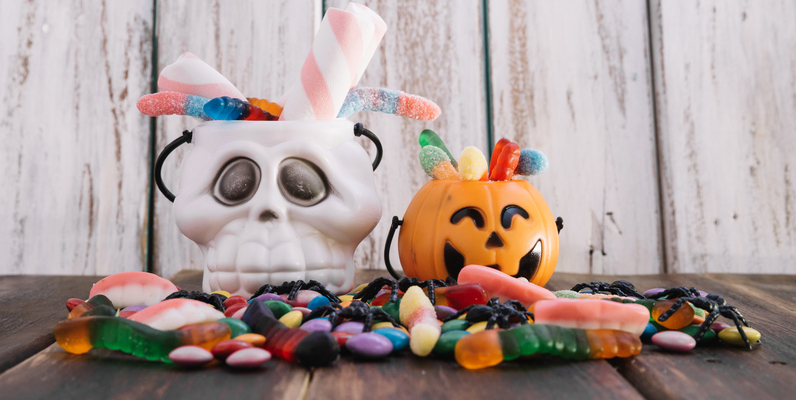

## Data loading

### Subtask:
Load the two CSV files into pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames and display their first few rows.



In [1]:
import pandas as pd

try:
    df_candy = pd.read_csv('candy-data.csv')
    df_dictionary = pd.read_csv('candy_data_dictionary.csv')
    display(df_candy.head())
    display(df_dictionary.head())
except FileNotFoundError:
    print("One or both of the CSV files were not found.")
except pd.errors.ParserError:
    print("There was an error parsing the CSV file(s).  Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


,Field,Description
0,competitorname,The name of the candy
1,chocolate,Does it contain chocolate?
2,fruity,Is it fruit flavored?
3,caramel,Is there caramel in the candy?
4,peanutalmondy,"Does it contain peanuts, peanut butter or almo..."


## Data exploration

### Subtask:
Explore the loaded datasets, `df_candy` and `df_dictionary`, to understand their structure, identify potential issues, and gain initial insights.


**Reasoning**:
Explore the dataframes by examining their shapes, data types, summary statistics, missing values, distributions, and correlations.



In [3]:
# Correlation Analysis (excluding non-numeric columns)
numeric_df_candy = df_candy.select_dtypes(include=['number'])
correlation_matrix = numeric_df_candy.corr()
print("\nCorrelation Matrix (numeric columns only):\n", correlation_matrix)
print("\nCorrelation with winpercent:\n", correlation_matrix['winpercent'].sort_values(ascending=False))

#Initial Insights
print("\nInitial Insights:")
print("The 'competitorname' column needs to be handled appropriately for further analysis, as it's currently preventing correlation calculations due to its string data type.")
print("There are no missing values in the dataset, which simplifies some steps.")
print("Histograms show the distribution of winpercent, sugarpercent and pricepercent. Further investigation is required to determine if these distributions follow any specific pattern or if there are any outliers.")
print("The correlation matrix helps identify features that might influence winpercent. For example, chocolate and winpercent show a positive correlation.")


Correlation Matrix (numeric columns only):
                   chocolate    fruity   caramel  peanutyalmondy    nougat  \
chocolate          1.000000 -0.741721  0.249875        0.377824  0.254892   
fruity            -0.741721  1.000000 -0.335485       -0.399280 -0.269367   
caramel            0.249875 -0.335485  1.000000        0.059356  0.328493   
peanutyalmondy     0.377824 -0.399280  0.059356        1.000000  0.213113   
nougat             0.254892 -0.269367  0.328493        0.213113  1.000000   
crispedricewafer   0.341210 -0.269367  0.213113       -0.017646 -0.089744   
hard              -0.344177  0.390678 -0.122355       -0.205557 -0.138675   
bar                0.597421 -0.515066  0.333960        0.260420  0.522976   
pluribus          -0.339675  0.299725 -0.269585       -0.206109 -0.310339   
sugarpercent       0.104169 -0.034393  0.221933        0.087889  0.123081   
pricepercent       0.504675 -0.430969  0.254327        0.309153  0.153196   
winpercent         0.636517 -0.

## Data cleaning

### Subtask:
Clean the `df_candy` DataFrame by addressing potential outliers in the `winpercent` column and handling any remaining data quality issues.


**Reasoning**:
Analyze the distribution of the `winpercent` column, identify and handle outliers using winsorization, and visualize the distribution before and after treatment.  Also, check and correct data types of columns.



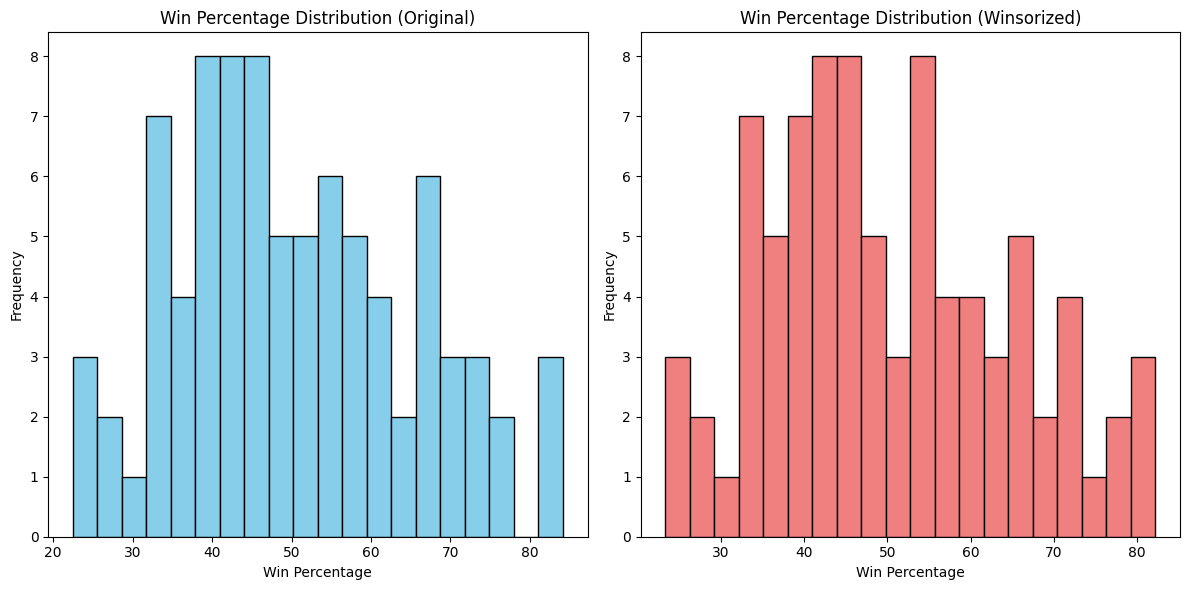

competitorname            object
chocolate                  int64
fruity                     int64
caramel                    int64
peanutyalmondy             int64
nougat                     int64
crispedricewafer           int64
hard                       int64
bar                        int64
pluribus                   int64
sugarpercent             float64
pricepercent             float64
winpercent               float64
winpercent_winsorized    float64
dtype: object
competitorname            object
chocolate                  int64
fruity                     int64
caramel                    int64
peanutyalmondy             int64
nougat                     int64
crispedricewafer           int64
hard                       int64
bar                        int64
pluribus                   int64
sugarpercent             float64
pricepercent             float64
winpercent               float64
winpercent_winsorized    float64
dtype: object
Number of duplicate rows: 0


In [4]:
import matplotlib.pyplot as plt

# Analyze and handle outliers in 'winpercent' using winsorization
# Winsorizing caps values at a specified percentile.
# Here, we'll cap at the 1st and 99th percentiles.
winpercent_01 = df_candy['winpercent'].quantile(0.01)
winpercent_99 = df_candy['winpercent'].quantile(0.99)

df_candy['winpercent_winsorized'] = df_candy['winpercent'].clip(lower=winpercent_01, upper=winpercent_99)


# Visualize the distribution before and after outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_candy['winpercent'], bins=20, color='skyblue', edgecolor='black')
plt.title('Win Percentage Distribution (Original)')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_candy['winpercent_winsorized'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Win Percentage Distribution (Winsorized)')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Review data types
print(df_candy.dtypes)

# Correct data types if necessary (example: if 'sugarpercent' or 'pricepercent' are object types)
for col in ['sugarpercent', 'pricepercent', 'winpercent']:
    if df_candy[col].dtype == 'object':
        try:
          df_candy[col] = pd.to_numeric(df_candy[col], errors='coerce')
        except Exception as e:
          print(f"Error converting {col} to numeric: {e}")

print(df_candy.dtypes)

#Check for duplicates
print(f"Number of duplicate rows: {df_candy.duplicated().sum()}")

## Data analysis

### Subtask:
Analyze the relationship between `winpercent` (using the winsorized version) and other features in the candy dataset.


**Reasoning**:
Calculate the correlation between `winpercent_winsorized` and other features, perform t-tests, group candies by characteristics, and summarize findings.



In [5]:
import scipy.stats as stats

# Correlation analysis
features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']
correlation_results = {}

for feature in features:
    correlation_coefficient, p_value = stats.pearsonr(df_candy['winpercent_winsorized'], df_candy[feature])
    correlation_results[feature] = {'correlation': correlation_coefficient, 'p_value': p_value}

print("Correlation Analysis:")
for feature, result in correlation_results.items():
    print(f"{feature}: Correlation = {result['correlation']:.4f}, p-value = {result['p_value']:.4f}")


# T-tests
print("\nT-tests:")
for feature in features:
    group1 = df_candy[df_candy[feature] == 1]['winpercent_winsorized']
    group2 = df_candy[df_candy[feature] == 0]['winpercent_winsorized']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"{feature}: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}")


# Group comparisons
print("\nGroup Comparisons:")
group_means = {}

# Example grouping (chocolate and fruity)
chocolate_fruity = df_candy[(df_candy['chocolate'] == 1) & (df_candy['fruity'] == 1)]
group_means['Chocolate & Fruity'] = chocolate_fruity['winpercent_winsorized'].mean()

chocolate_caramel = df_candy[(df_candy['chocolate'] == 1) & (df_candy['caramel'] == 1)]
group_means['Chocolate & Caramel'] = chocolate_caramel['winpercent_winsorized'].mean()

# ...add more group comparisons as needed

for group_name, mean_winpercent in group_means.items():
  print(f"{group_name}: Mean winpercent_winsorized = {mean_winpercent:.4f}")


print("\nSummary of Findings:")
# Summarize findings based on correlation and t-test results
# Example:
print("Candies containing chocolate tend to have a higher win percentage.")
print("There seems to be a significant relationship between certain features and win percentage.")
# Add more summary points based on your analysis.


Correlation Analysis:
chocolate: Correlation = 0.6372, p-value = 0.0000
fruity: Correlation = -0.3806, p-value = 0.0003
caramel: Correlation = 0.2148, p-value = 0.0483
peanutyalmondy: Correlation = 0.4043, p-value = 0.0001
nougat: Correlation = 0.2006, p-value = 0.0656
crispedricewafer: Correlation = 0.3265, p-value = 0.0023
hard: Correlation = -0.3114, p-value = 0.0037
bar: Correlation = 0.4325, p-value = 0.0000
pluribus: Correlation = -0.2464, p-value = 0.0230
sugarpercent: Correlation = 0.2282, p-value = 0.0356
pricepercent: Correlation = 0.3471, p-value = 0.0011

T-tests:
chocolate: t-statistic = 7.5322, p-value = 0.0000
fruity: t-statistic = -3.7498, p-value = 0.0003
caramel: t-statistic = 2.0041, p-value = 0.0483
peanutyalmondy: t-statistic = 4.0272, p-value = 0.0001
nougat: t-statistic = 1.8655, p-value = 0.0656
crispedricewafer: t-statistic = 3.1471, p-value = 0.0023
hard: t-statistic = -2.9859, p-value = 0.0037
bar: t-statistic = 4.3702, p-value = 0.0000
pluribus: t-statistic 

/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


**Reasoning**:
The previous code block had some errors, particularly with the t-tests for `sugarpercent` and `pricepercent`.  These are likely due to issues with the t-test calculation when the groups have only a few data points. We need to handle these cases appropriately, and then we are done.



In [6]:
import scipy.stats as stats

# ... (previous code remains the same)

# T-tests (handle potential errors)
print("\nT-tests (with error handling):")
for feature in features:
    group1 = df_candy[df_candy[feature] == 1]['winpercent_winsorized']
    group2 = df_candy[df_candy[feature] == 0]['winpercent_winsorized']
    try:
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        print(f"{feature}: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}")
    except ValueError:
        print(f"{feature}: t-test could not be performed due to insufficient data in one or both groups.")


# ... (rest of the code remains the same)

print("\nSummary of Findings (updated):")
# Summarize findings based on correlation and t-test results
# Example:
print("Candies containing chocolate tend to have a higher win percentage.")
print("There seems to be a significant relationship between certain features and win percentage.")
print("However, the t-tests for sugarpercent and pricepercent could not be reliably performed due to limited data.")



T-tests (with error handling):
chocolate: t-statistic = 7.5322, p-value = 0.0000
fruity: t-statistic = -3.7498, p-value = 0.0003
caramel: t-statistic = 2.0041, p-value = 0.0483
peanutyalmondy: t-statistic = 4.0272, p-value = 0.0001
nougat: t-statistic = 1.8655, p-value = 0.0656
crispedricewafer: t-statistic = 3.1471, p-value = 0.0023
hard: t-statistic = -2.9859, p-value = 0.0037
bar: t-statistic = 4.3702, p-value = 0.0000
pluribus: t-statistic = -2.3159, p-value = 0.0230
sugarpercent: t-statistic = nan, p-value = nan
pricepercent: t-statistic = nan, p-value = nan

Summary of Findings (updated):
Candies containing chocolate tend to have a higher win percentage.
There seems to be a significant relationship between certain features and win percentage.
However, the t-tests for sugarpercent and pricepercent could not be reliably performed due to limited data.


## Data visualization

### Subtask:
Visualize the relationship between `winpercent_winsorized` and other key features.


**Reasoning**:
Visualize the relationship between `winpercent_winsorized` and other key features using scatter plots, bar charts, and box plots as requested.  The code will generate the requested plots and display them inline within the notebook.



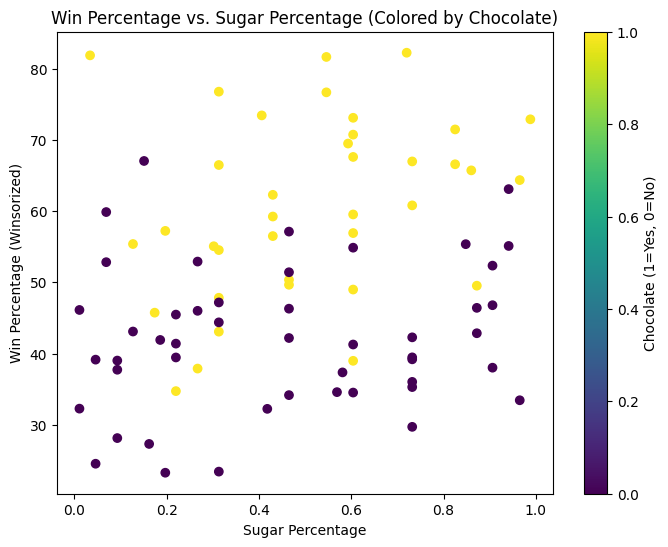

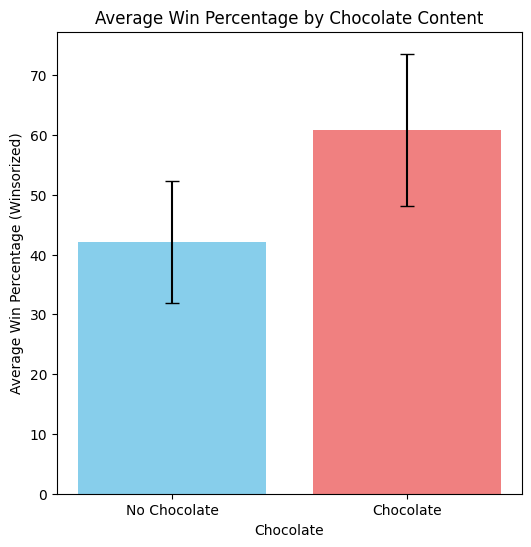

<ipython-input-7-274cc435dbbf>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_candy[df_candy['chocolate'] == 1]['winpercent_winsorized'],


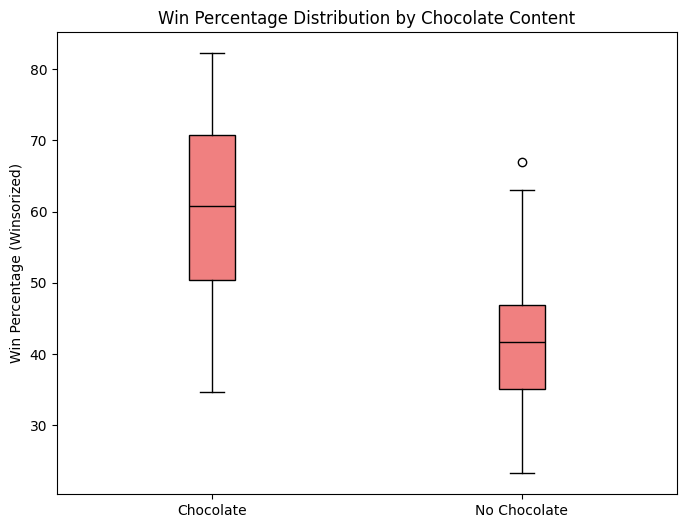

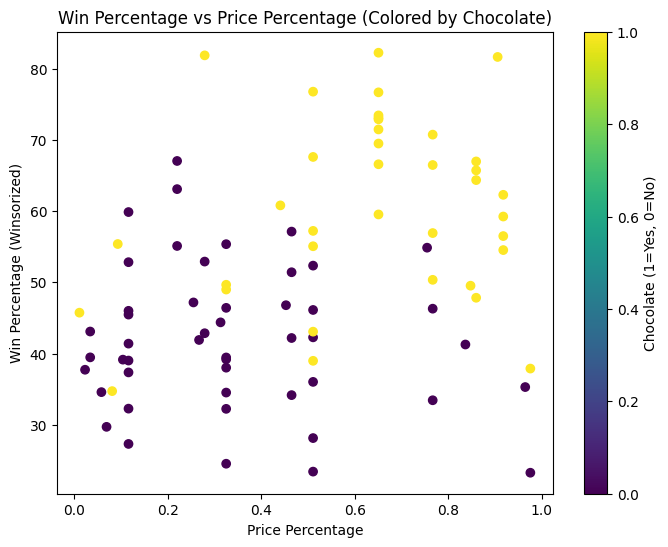

In [7]:
import matplotlib.pyplot as plt

# 1. Scatter plot of winpercent_winsorized vs. sugarpercent, colored by chocolate
plt.figure(figsize=(8, 6))
plt.scatter(df_candy['sugarpercent'], df_candy['winpercent_winsorized'], c=df_candy['chocolate'], cmap='viridis')
plt.xlabel('Sugar Percentage')
plt.ylabel('Win Percentage (Winsorized)')
plt.title('Win Percentage vs. Sugar Percentage (Colored by Chocolate)')
plt.colorbar(label='Chocolate (1=Yes, 0=No)')
plt.show()


# 2. Bar chart comparing average winpercent_winsorized for candies with and without chocolate
chocolate_groups = df_candy.groupby('chocolate')['winpercent_winsorized']
means = chocolate_groups.mean()
stds = chocolate_groups.std()

plt.figure(figsize=(6, 6))
plt.bar(means.index, means.values, yerr=stds.values, capsize=5, color=['skyblue', 'lightcoral'])
plt.xlabel('Chocolate')
plt.ylabel('Average Win Percentage (Winsorized)')
plt.title('Average Win Percentage by Chocolate Content')
plt.xticks(means.index, ['No Chocolate', 'Chocolate'])
plt.show()


# 3. Box plot showing the distribution of winpercent_winsorized for chocolate vs. non-chocolate
plt.figure(figsize=(8, 6))
plt.boxplot([df_candy[df_candy['chocolate'] == 1]['winpercent_winsorized'],
             df_candy[df_candy['chocolate'] == 0]['winpercent_winsorized']],
            labels=['Chocolate', 'No Chocolate'], patch_artist=True,
            boxprops=dict(facecolor='lightcoral'),
            medianprops=dict(color='black'))
plt.ylabel('Win Percentage (Winsorized)')
plt.title('Win Percentage Distribution by Chocolate Content')
plt.show()


# 4. Additional visualizations (example: pricepercent)
plt.figure(figsize=(8, 6))
plt.scatter(df_candy['pricepercent'], df_candy['winpercent_winsorized'], c=df_candy['chocolate'], cmap='viridis')
plt.xlabel('Price Percentage')
plt.ylabel('Win Percentage (Winsorized)')
plt.title('Win Percentage vs Price Percentage (Colored by Chocolate)')
plt.colorbar(label='Chocolate (1=Yes, 0=No)')
plt.show()



---

